# Predicting the weight of the fish from various measurements obtained from the images----the file is downloaded from kaggle repository ---fish.csv

shortcuts of jupyter----help----.tab----?---- intellisense (enables you to ask an object what methods it has).
%config IPCompleter.greedy=True

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline


In [2]:
fish_file = pd.read_csv('Fish.csv')
fish_file.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [3]:
neworder = ['Species','Width','Length1','Length2','Length3','Height','Weight']
fish_file = fish_file.reindex(columns=neworder)

fish_file

,Species,Width,Length1,Length2,Length3,Height,Weight
0,Bream,4.0200,23.2,25.4,30.0,11.5200,242.0
1,Bream,4.3056,24.0,26.3,31.2,12.4800,290.0
2,Bream,4.6961,23.9,26.5,31.1,12.3778,340.0
3,Bream,4.4555,26.3,29.0,33.5,12.7300,363.0
4,Bream,5.1340,26.5,29.0,34.0,12.4440,430.0
...,...,...,...,...,...,...,...
154,Smelt,1.3936,11.5,12.2,13.4,2.0904,12.2
155,Smelt,1.2690,11.7,12.4,13.5,2.4300,13.4
156,Smelt,1.2558,12.1,13.0,13.8,2.2770,12.2
157,Smelt,2.0672,13.2,14.3,15.2,2.8728,19.7


In [4]:
fish_file.head()
fish_file.tail()


,Species,Width,Length1,Length2,Length3,Height,Weight
154,Smelt,1.3936,11.5,12.2,13.4,2.0904,12.2
155,Smelt,1.2690,11.7,12.4,13.5,2.4300,13.4
156,Smelt,1.2558,12.1,13.0,13.8,2.2770,12.2
157,Smelt,2.0672,13.2,14.3,15.2,2.8728,19.7
158,Smelt,1.8792,13.8,15.0,16.2,2.9322,19.9


loaded data and analysing it

In [5]:
#fish_file.reset_index(inplace=True)
#fish_file.set_index('Species', inplace=True)
fish_file.rename(columns= {'Length1':'LengthVertical', 'Length2':'LengthDiagonal', 'Length3':'LengthCross'}, inplace=True)
fish_file.head()


,Species,Width,LengthVertical,LengthDiagonal,LengthCross,Height,Weight
0,Bream,4.0200,23.2,25.4,30.0,11.5200,242.0
1,Bream,4.3056,24.0,26.3,31.2,12.4800,290.0
2,Bream,4.6961,23.9,26.5,31.1,12.3778,340.0
3,Bream,4.4555,26.3,29.0,33.5,12.7300,363.0
4,Bream,5.1340,26.5,29.0,34.0,12.4440,430.0


In [6]:
fish_file

,Species,Width,LengthVertical,LengthDiagonal,LengthCross,Height,Weight
0,Bream,4.0200,23.2,25.4,30.0,11.5200,242.0
1,Bream,4.3056,24.0,26.3,31.2,12.4800,290.0
2,Bream,4.6961,23.9,26.5,31.1,12.3778,340.0
3,Bream,4.4555,26.3,29.0,33.5,12.7300,363.0
4,Bream,5.1340,26.5,29.0,34.0,12.4440,430.0
...,...,...,...,...,...,...,...
154,Smelt,1.3936,11.5,12.2,13.4,2.0904,12.2
155,Smelt,1.2690,11.7,12.4,13.5,2.4300,13.4
156,Smelt,1.2558,12.1,13.0,13.8,2.2770,12.2
157,Smelt,2.0672,13.2,14.3,15.2,2.8728,19.7


In [7]:
fish_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species           159 non-null object
Width             159 non-null float64
LengthVertical    159 non-null float64
LengthDiagonal    159 non-null float64
LengthCross       159 non-null float64
Height            159 non-null float64
Weight            159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
fish_file.iloc[1]


Species            Bream
Width             4.3056
LengthVertical        24
LengthDiagonal      26.3
LengthCross         31.2
Height             12.48
Weight               290
Name: 1, dtype: object

In [9]:
fish_file.iloc[0:3,0:2]

,Species,Width
0,Bream,4.0200
1,Bream,4.3056
2,Bream,4.6961


accessing rows using iloc once index is set ---iloc[row,column]

In [10]:
fish_file.loc[0:5, ['Species','LengthVertical','LengthDiagonal']]

,Species,LengthVertical,LengthDiagonal
0,Bream,23.2,25.4
1,Bream,24.0,26.3
2,Bream,23.9,26.5
3,Bream,26.3,29.0
4,Bream,26.5,29.0
5,Bream,26.8,29.7


In [11]:
fish_file.Species.value_counts()


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [12]:
y = fish_file.groupby('Species')
y.count()

,Width,LengthVertical,LengthDiagonal,LengthCross,Height,Weight
Species,,,,,,
Bream,35,35,35,35,35,35
Parkki,11,11,11,11,11,11
Perch,56,56,56,56,56,56
Pike,17,17,17,17,17,17
Roach,20,20,20,20,20,20
Smelt,14,14,14,14,14,14
Whitefish,6,6,6,6,6,6


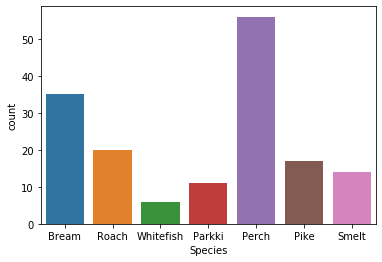

In [13]:
#plt.hist('Species')
sns.countplot(data = fish_file, x = 'Species')


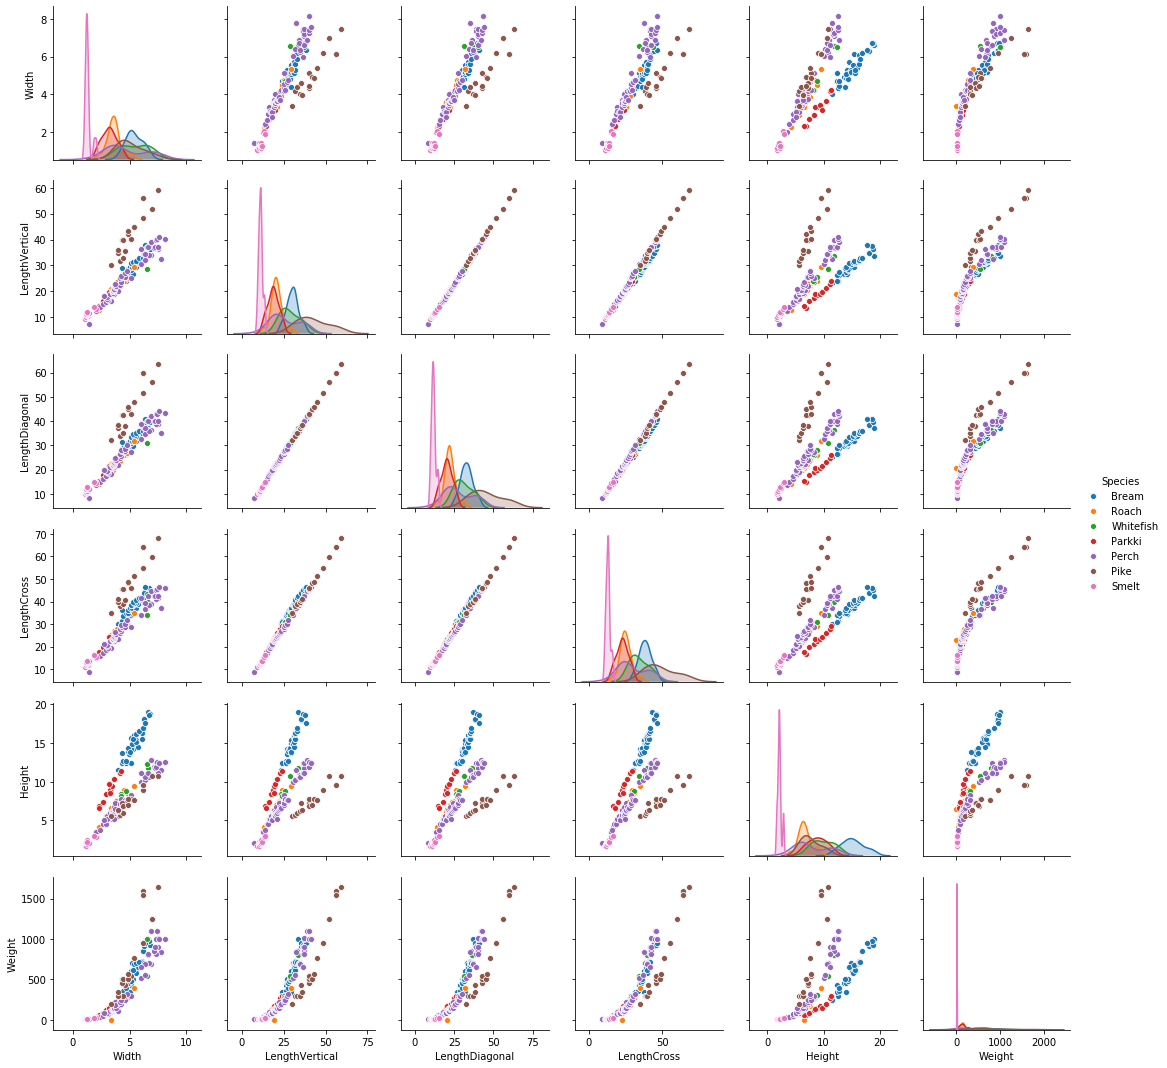

In [14]:
g = sns.pairplot(fish_file, kind='scatter', hue='Species');

input to the hist() must be an array of values ---y - axis will be its frequency

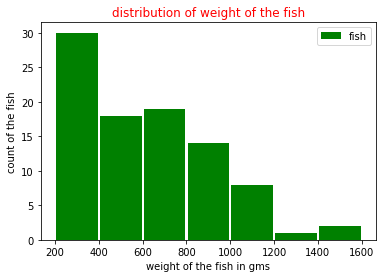

In [15]:
weight_arr = fish_file['Weight']
plt.hist(weight_arr,bins = [200,400,600,800,1000,1200,1400,1600],rwidth=0.95,color='g',histtype='bar',label='fish')
plt.xlabel('weight of the fish in gms')
plt.ylabel('count of the fish')
plt.title('distribution of weight of the fish' ,color = 'r')
plt.legend()
plt.show()

In [16]:
ff1 = fish_file.copy()
ff1.pop('Weight')
ff1.pop('Species')

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

iris = sns.load_dataset("iris")
species = iris.pop("species")
 g = sns.clustermap(iris)

Text(0.5, 1.0, 'Diagonal vs Weight')

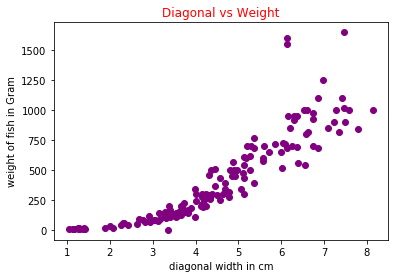

In [17]:
#sns.clustermap(ff1)
vx1 = fish_file.Weight
vy1 = fish_file.Width
plt.scatter(vy1,vx1,marker='o',color = 'purple')
plt.ylabel("weight of fish in Gram")
plt.xlabel("diagonal width in cm")
plt.title('Diagonal vs Weight',color='r')

In [18]:
corr_matrix = fish_file.corr()
corr_matrix

,Width,LengthVertical,LengthDiagonal,LengthCross,Height,Weight
Width,1.000000,0.867050,0.873547,0.878520,0.792881,0.886507
LengthVertical,0.867050,1.000000,0.999517,0.992031,0.625378,0.915712
LengthDiagonal,0.873547,0.999517,1.000000,0.994103,0.640441,0.918618
LengthCross,0.878520,0.992031,0.994103,1.000000,0.703409,0.923044
Height,0.792881,0.625378,0.640441,0.703409,1.000000,0.724345
Weight,0.886507,0.915712,0.918618,0.923044,0.724345,1.000000


The gradients in the heatmap vary based on the strength of the correlation ----- easy to spot potential attributes having strong correlations amongst themselves.

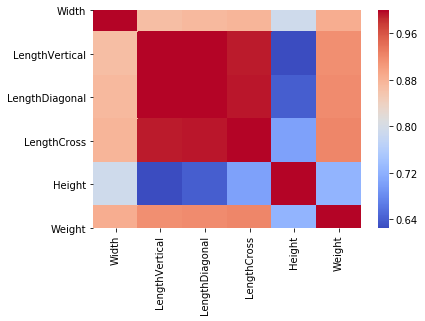

In [19]:
sns.heatmap(corr_matrix,cmap="coolwarm")

basic data distribution of any of the feature ----- using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185B16A81D0>,
      dtype=object)

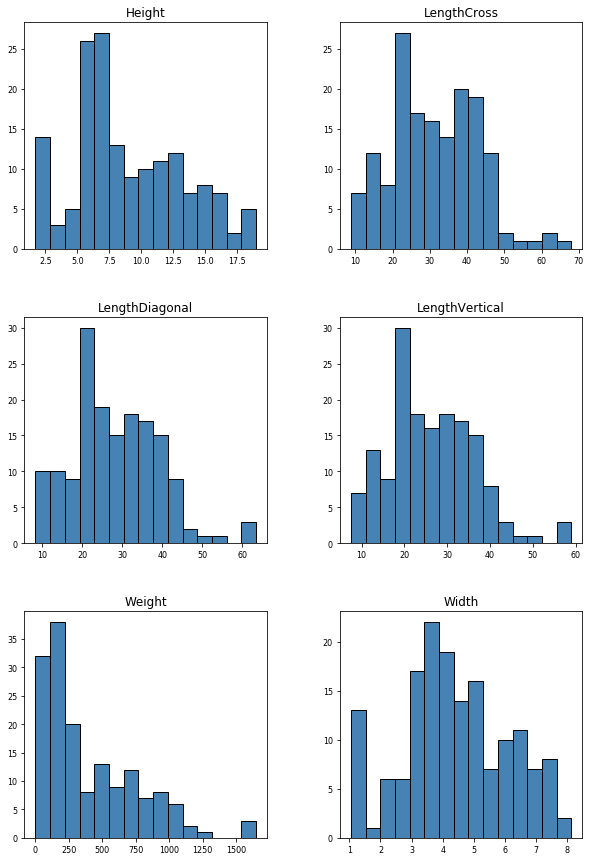

In [20]:
fish_file.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False ,
figsize=(10,15))
         


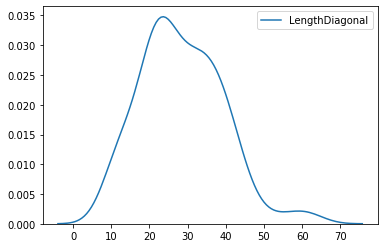

In [21]:
#sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')
sns.kdeplot(fish_file['LengthDiagonal'])

In [22]:
ff2 = fish_file.copy()
ff2.pop('Species')

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

the SciKit library provides a tool, called the Model Selection library----There’s a class in the library which is named ‘train_test_split.both independent and dependent variables are split into test and train---- xTrain and xTest — yTrain and yTest

In [23]:
x = fish_file.iloc[:,1:6] ###cutting out categorical data
y = fish_file.iloc[:,6] 
x,y


(      Width  LengthVertical  LengthDiagonal  LengthCross   Height
 0    4.0200            23.2            25.4         30.0  11.5200
 1    4.3056            24.0            26.3         31.2  12.4800
 2    4.6961            23.9            26.5         31.1  12.3778
 3    4.4555            26.3            29.0         33.5  12.7300
 4    5.1340            26.5            29.0         34.0  12.4440
 ..      ...             ...             ...          ...      ...
 154  1.3936            11.5            12.2         13.4   2.0904
 155  1.2690            11.7            12.4         13.5   2.4300
 156  1.2558            12.1            13.0         13.8   2.2770
 157  2.0672            13.2            14.3         15.2   2.8728
 158  1.8792            13.8            15.0         16.2   2.9322
 
 [159 rows x 5 columns], 0      242.0
 1      290.0
 2      340.0
 3      363.0
 4      430.0
        ...  
 154     12.2
 155     13.4
 156     12.2
 157     19.7
 158     19.9
 Name: Weight, L

splitting 23% as test data i.e 120 training samples and 39 test data

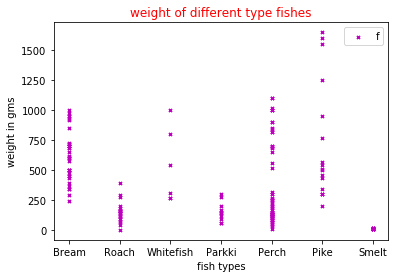

In [24]:
plt.scatter(fish_file.Species , fish_file.Weight , color = "m", marker = "x", s = 10)
plt.title('weight of different type fishes',color = 'r')
plt.xlabel('fish types')
plt.ylabel('weight in gms')
plt.legend('fish')
plt.show()

In [25]:
x_train , x_test , y_train , y_test = train_test_split( x, y, test_size=0.24, random_state=42)
x_train

,Width,LengthVertical,LengthDiagonal,LengthCross,Height
118,7.3514,36.6,39.0,41.3,12.4313
26,6.0900,32.0,35.0,40.6,16.3618
137,4.8960,42.0,45.0,48.0,6.9600
146,1.1600,10.0,10.5,11.6,1.9720
90,3.9950,20.0,22.0,23.5,5.5225
...,...,...,...,...,...
71,4.2340,24.0,26.0,29.0,11.3680
106,4.2042,25.9,28.0,29.4,7.8204
14,5.1708,29.4,32.0,37.2,14.9544
92,3.6240,20.5,22.5,24.0,6.7920


Roach is less weight fish ----- Pike has high weighted fishes----smelt has considerably small weighted fishes
multi(multiple feature) linear regression model ---- Multiple Linear Regression Formula:

y = b0 + b1X1 + b2X2 + b3X3 + ... + bnXn -----linear in terms of weight and input vectors

y : Dependent variable

b0 : Constant

b1 - bn : Coefficients

X1 - Xn : Independent variables

In [26]:
# create linear regression object 
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
print("coefficent: ",reg.coef_ ,"\nintercept: ",reg.intercept_)

coefficent:  [ 17.12213988  50.54145835   7.15337486 -29.80889897  25.77406955] 
intercept:  -513.6037135053043


In [27]:
x_test

,Width,LengthVertical,LengthDiagonal,LengthCross,Height
78,3.1234,16.8,18.7,19.4,5.1992
155,1.2690,11.7,12.4,13.5,2.4300
128,3.3756,30.0,32.3,34.8,5.5680
55,4.2476,23.6,26.0,28.7,8.3804
94,3.6260,21.0,23.0,24.5,5.2185
29,6.6030,33.5,37.0,42.6,18.9570
147,1.1484,10.1,10.6,11.6,1.7284
51,3.9060,23.6,25.2,27.9,7.0866
98,4.1658,22.6,24.6,26.2,6.7334
141,6.9849,52.0,56.0,59.7,10.6863


In [28]:
y_pred = reg.predict(x_test)
accu = r2_score(y_test,y_pred)
print(accu)
y_pred

0.8788825628142313


array([  78.45209091, -151.62795402,  397.65187573,  298.37206353,
        178.56337022,  776.00744138, -208.88147137,  277.30106864,
        268.48764419, 1130.57571911,  610.33265958,  791.17539046,
        585.77374239,  177.2907085 ,  656.05593634,  789.04148246,
        922.39020186,  360.55068631,  261.57845932,  590.74750176,
       -169.52937145,  627.96957841,  526.86019512,  518.94723365,
        792.99148443,  913.88337823,  221.43173367,  303.29264434,
       -232.64808014, -171.54807174,  708.02379568,   21.51747992,
         11.11323265,  831.36552248,  356.27837632,  169.91383141,
        175.97302505,  124.65413623,  227.52321493])

In [29]:

t = pd.DataFrame(list(zip(y_test, y_pred)) , columns=['original Weight','predicted Weight'])
t

,original Weight,predicted Weight
0,78.0,78.452091
1,13.4,-151.627954
2,200.0,397.651876
3,270.0,298.372064
4,150.0,178.563370
5,1000.0,776.007441
6,7.0,-208.881471
7,180.0,277.301069
8,188.0,268.487644
9,1250.0,1130.575719


In [30]:

arr1 = np.array([4.0200,23.2,25.4,30.0,11.5200])
arr2 = np.array([4.000,21.2,20.4,25.0,9.5200])            
reg.predict([arr1,arr2])

array([312.13515635, 272.43927826])

VISUALISATION OF THE PREDICTIONS----to know the accuracy of the model

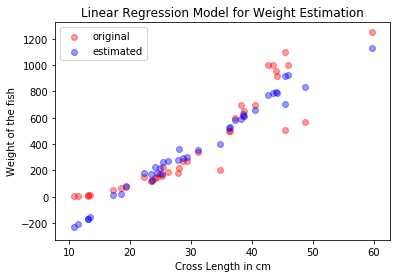

In [31]:
plt.scatter(x_test['LengthCross'], y_test, color='red', alpha=0.4, label='original')
plt.scatter(x_test['LengthCross'], y_pred, color='blue', alpha=0.4, label = 'estimated')
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend()

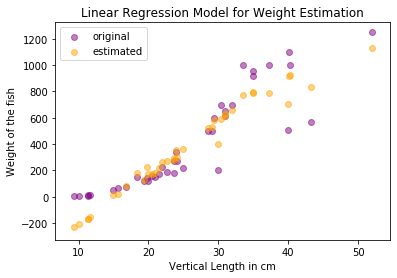

In [32]:
plt.scatter(x_test['LengthVertical'], y_test, color='purple', alpha=0.5 ,label = 'original')
plt.scatter(x_test['LengthVertical'], y_pred, color='orange', alpha=0.5 , label ='estimated')
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend()

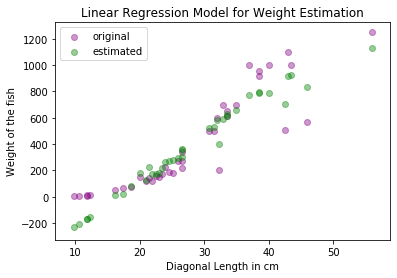

In [33]:
plt.scatter(x_test['LengthDiagonal'], y_test, color='purple', alpha=0.4 ,label = 'original')
plt.scatter(x_test['LengthDiagonal'], y_pred, color='green', alpha=0.4 ,label = 'estimated')
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend()

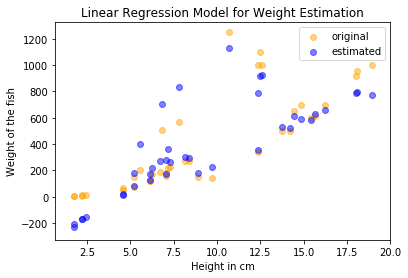

In [34]:
plt.scatter(x_test['Height'], y_test, color='orange', alpha=0.5,label = 'original')
plt.scatter(x_test['Height'], y_pred, color='blue', alpha=0.5,label = 'estimated')
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend()

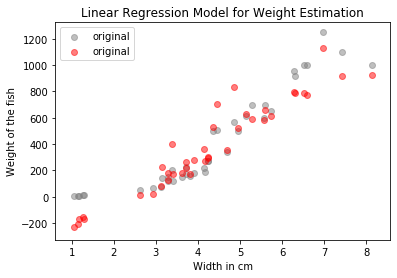

In [35]:
plt.scatter(x_test['Width'], y_test, color='gray', alpha=0.5,label = 'original')
plt.scatter(x_test['Width'], y_pred, color='red', alpha=0.5,label = 'original')
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend()